Lambda School Data Science, Unit 2: Predictive Modeling

# Applied Modeling, Module 2

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Plot the distribution of your target. 
    - Regression problem: Is your target skewed? Then, log-transform it.
    - Classification: Are your classes imbalanced? Then, don't use just accuracy. And try `class_balance` parameter in scikit-learn.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline?
- [ ] Share at least 1 visualization on Slack.

You need to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.


## Reading

### Today
- [imbalance-learn](https://github.com/scikit-learn-contrib/imbalanced-learn)
- [Learning from Imbalanced Classes](https://www.svds.com/tbt-learning-imbalanced-classes/)
- [Machine Learning Meets Economics](http://blog.mldb.ai/blog/posts/2016/01/ml-meets-economics/)
- [ROC curves and Area Under the Curve explained](https://www.dataschool.io/roc-curves-and-auc-explained/)
- [The philosophical argument for using ROC curves](https://lukeoakdenrayner.wordpress.com/2018/01/07/the-philosophical-argument-for-using-roc-curves/)


### Yesterday
- [Attacking discrimination with smarter machine learning](https://research.google.com/bigpicture/attacking-discrimination-in-ml/), by Google Research, with  interactive visualizations. _"A threshold classifier essentially makes a yes/no decision, putting things in one category or another. We look at how these classifiers work, ways they can potentially be unfair, and how you might turn an unfair classifier into a fairer one. As an illustrative example, we focus on loan granting scenarios where a bank may grant or deny a loan based on a single, automatically computed number such as a credit score."_
- [How Shopify Capital Uses Quantile Regression To Help Merchants Succeed](https://engineering.shopify.com/blogs/engineering/how-shopify-uses-machine-learning-to-help-our-merchants-grow-their-business)
- [Maximizing Scarce Maintenance Resources with Data: Applying predictive modeling, precision at k, and clustering to optimize impact](https://towardsdatascience.com/maximizing-scarce-maintenance-resources-with-data-8f3491133050), **by Lambda DS3 student** Michael Brady. His blog post extends the Tanzania Waterpumps scenario, far beyond what's in the lecture notebook.
- [Notebook about how to calculate expected value from a confusion matrix by treating it as a cost-benefit matrix](https://github.com/podopie/DAT18NYC/blob/master/classes/13-expected_value_cost_benefit_analysis.ipynb)
- [Simple guide to confusion matrix terminology](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) by Kevin Markham, with video
- [Visualizing Machine Learning Thresholds to Make Better Business Decisions](https://blog.insightdatascience.com/visualizing-machine-learning-thresholds-to-make-better-business-decisions-4ab07f823415)






In [1]:
# conda install -c conda-forge category_encoders
# conda update -n base -c defaults conda
# pip install --upgrade category_encoders

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\sarmen\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [4]:
from xgboost import XGBClassifier

# BELOW DATASET FROM https://query1.finance.yahoo.com/v7/finance/download/SPY?period1=728294400&period2=1566889200&interval=1d&events=history&crumb=ixT1ci5YI3E

In [5]:
# Setting specific columns to use (using unadjusted close and not
#  accounting for the splits and dividends)
columns = ['Date','Close','Volume']

# # Calling data set (from github)
# spy = pd.read_csv('https://raw.githubusercontent.com/SarmenSinanian/DS-Unit-2-Applied-Modeling/master/SPY.csv',
#                    usecols = columns)

# # Calling data set (locally)
# spy = pd.read_csv(r'E:\Desktop\Lambda_School\Assignments\Unit 2 Sprint 7 PROJECT\SPY.csv',
#                   usecols = columns)

# # Calling data set (locally)
# spy = pd.read_csv(r'E:\Desktop\Lambda_School\Assignments\Unit 2 Sprint 7 PROJECT\SPY09-05-2019.csv',
#                   usecols = columns)

# # Calling data set (locally)
# spy = pd.read_csv(r'E:\Desktop\Lambda_School\Assignments\Unit 2 Sprint 7 PROJECT\SPY10-12-2019.csv',
#                   usecols = columns)

# # Calling data set (locally)
# spy = pd.read_csv(r'E:\Desktop\Lambda_School\Assignments\Unit 2 Sprint 7 PROJECT\SPY10-24-2019.csv',
#                   usecols = columns)

# # Calling data set (from github)
# spy = pd.read_csv('https://raw.githubusercontent.com/SarmenSinanian/DS-Unit-2-Applied-Modeling/master/SPY%2011-25-2019.csv',
#                    usecols = columns)

# Calling data set (from github)
spy = pd.read_csv('https://raw.githubusercontent.com/SarmenSinanian/DS-Unit-2-Applied-Modeling/master/SPY%2012-3-2019.csv',
                   usecols = columns)

# # Calling QQQ data set (from github)
# spy = pd.read_csv('https://raw.githubusercontent.com/SarmenSinanian/DS-Unit-2-Applied-Modeling/master/QQQ%2012-3-2019.csv',
#                    usecols = columns)

In [6]:
spy['Date_String'] = spy['Date']

In [7]:
# Checking columns
spy.head()

,Date,Close,Volume,Date_String
0,1993-01-29,43.93750,1003200,1993-01-29
1,1993-02-01,44.25000,480500,1993-02-01
2,1993-02-02,44.34375,201300,1993-02-02
3,1993-02-03,44.81250,529400,1993-02-03
4,1993-02-04,45.00000,531500,1993-02-04


In [8]:
spy.tail()

,Date,Close,Volume,Date_String
6755,2019-11-25,313.369995,48647200,2019-11-25
6756,2019-11-26,314.079987,37569000,2019-11-26
6757,2019-11-27,315.480011,44444600,2019-11-27
6758,2019-11-29,314.309998,36592700,2019-11-29
6759,2019-12-02,311.640015,75767800,2019-12-02


In [9]:
# spy_na = spy.isna().sum()
# spy_na
def isna(dataframe):
    print(dataframe.isna().sum())
    return

isna(spy)

Date           0
Close          0
Volume         0
Date_String    0
dtype: int64


In [10]:
spy.describe()

,Close,Volume
count,6760.000000,6.760000e+03
mean,136.488578,8.406512e+07
std,62.638535,9.765457e+07
min,43.406250,5.200000e+03
25%,97.710938,7.171250e+06
50%,125.465000,5.706840e+07
75%,155.509998,1.214404e+08
max,315.480011,8.710263e+08


In [11]:
spy.shape

(6760, 4)

In [12]:
spy.isna().sum()

Date           0
Close          0
Volume         0
Date_String    0
dtype: int64

In [13]:
# Changing Dat to datetime format
spy['Date'] = pd.to_datetime(spy['Date'])

In [14]:
spy.dtypes

Date           datetime64[ns]
Close                 float64
Volume                  int64
Date_String            object
dtype: object

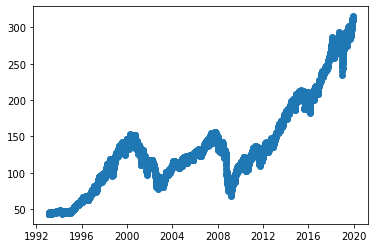

In [15]:
# Visualizing total dataset without volumne

plt.plot_date(spy['Date'], spy['Close'])

# Choose your target. Which column in your tabular dataset will you predict?


In [16]:
#  PRICE(CLOSE) NEXT DAY ABOVE/BELOW PREVIOUS DAY BASED ON ROLLING MEAN(SMA) OR RELATIVE STRENGTH (RSI)***

# Choose which observations you will use to train, validate, and test your model. And which observations, if any, to exclude.


In [17]:
#*WILL USE ALL SPY (S&P 500 ETF) DATA*

# Determine whether your problem is regression or classification.


In [18]:
# *CLASSIFICATION (IS THIS TICKER OVER/UNDER THE X_DAY ROLLING MEAN ***AND*** ALSO OVER/UNDER BOUGHT ON THE RSI?)*
# *AKA 3 WAY CONFUSION MATRIX WITH UNDER TO BOTH AS THE HIGHEST LIKELIHOOD PREDICTOR OF NEXT DAY/WEEKS/MONTHS POSITIVE RETURNS*

# Choose your evaluation metric.

In [19]:
# WILL USE ACCURACY SCORE

# Begin with baselines: majority class baseline for classification, or mean baseline for regression, with your metric of choice.


In [20]:
from sklearn.model_selection import train_test_split
spy['Date'] = pd.to_datetime(spy['Date'])
spy['Year'] = spy['Date'].dt.year

# Begin with baselines: majority class baseline for classification, or mean baseline for regression, with your metric of choice.


In [21]:
spy['SMA'] = spy.Close.rolling(window=14).mean()
spy['SMA_Yesterday'] = spy['SMA'].shift(1)

In [22]:
spy['Above_14D_SMA_Yesterday'] = np.where(spy['SMA'].shift(1)<spy['Close'].shift(1), 0,1)

In [23]:
spy['Below_14D_SMA_Yesterday'] = np.where(spy['SMA'].shift(1)>spy['Close'].shift(1), 0,1)

In [24]:
spy_numeric_diff = spy[['Close']].diff()[1:]

spy['Close_Higher_Than_Yesterday'] = np.insert(np.where(spy_numeric_diff[['Close']] >=0, '1','0'), 0, np.nan)

In [25]:
spy_2019 = spy[spy['Year'] == 2019]

In [26]:
y_train = spy_2019['Close_Higher_Than_Yesterday']

In [27]:
majority_class = y_train.mode()[0]

In [28]:
y_pred = [majority_class]*len(y_train)

In [29]:
from sklearn.metrics import accuracy_score
print('MAJORITY CLASS Validation Accuracy',accuracy_score(y_train, y_pred))

MAJORITY CLASS Validation Accuracy 0.5818965517241379


# Begin to clean and explore your data.

In [30]:
spy_2019 = spy[spy['Year'] == 2019]
spy_2018 = spy[spy['Year'] == 2018]
spy_2017 = spy[spy['Year'] == 2017]
spy_2016 = spy[spy['Year'] == 2016]
spy_2015 = spy[spy['Year'] == 2015]
spy_2014 = spy[spy['Year'] == 2014]
spy_2013 = spy[spy['Year'] == 2013]
spy_2012 = spy[spy['Year'] == 2012]
spy_2011 = spy[spy['Year'] == 2011]
spy_2010 = spy[spy['Year'] == 2010]
spy_2009 = spy[spy['Year'] == 2009]
spy_2008 = spy[spy['Year'] == 2008]
spy_2007 = spy[spy['Year'] == 2007]
spy_2006 = spy[spy['Year'] == 2006]
spy_2005 = spy[spy['Year'] == 2005]
spy_2004 = spy[spy['Year'] == 2004]
spy_2003 = spy[spy['Year'] == 2003]
spy_2002 = spy[spy['Year'] == 2002]
spy_2001 = spy[spy['Year'] == 2001]
spy_2000 = spy[spy['Year'] == 2000]
spy_1999 = spy[spy['Year'] == 1999]
spy_1998 = spy[spy['Year'] == 1998]
spy_1997 = spy[spy['Year'] == 1997]
spy_1996 = spy[spy['Year'] == 1996]
spy_1995 = spy[spy['Year'] == 1995]
spy_1994 = spy[spy['Year'] == 1994]
spy_1993 = spy[spy['Year'] == 1993]

# #FOLLOWING IS FOR QQQ
# spy_2019 = spy[spy['Year'] == 2019]
# spy_2018 = spy[spy['Year'] == 2018]
# spy_2017 = spy[spy['Year'] == 2017]
# spy_2016 = spy[spy['Year'] == 2016]
# spy_2015 = spy[spy['Year'] == 2015]
# spy_2014 = spy[spy['Year'] == 2014]
# spy_2013 = spy[spy['Year'] == 2013]
# spy_2012 = spy[spy['Year'] == 2012]
# spy_2011 = spy[spy['Year'] == 2011]
# spy_2010 = spy[spy['Year'] == 2010]
# spy_2009 = spy[spy['Year'] == 2009]
# spy_2008 = spy[spy['Year'] == 2008]
# spy_2007 = spy[spy['Year'] == 2007]
# spy_2006 = spy[spy['Year'] == 2006]
# spy_2005 = spy[spy['Year'] == 2005]
# spy_2004 = spy[spy['Year'] == 2004]
# spy_2003 = spy[spy['Year'] == 2003]
# spy_2002 = spy[spy['Year'] == 2002]
# spy_2001 = spy[spy['Year'] == 2001]
# spy_2000 = spy[spy['Year'] == 2000]

# Plot the distribution of your target.
### Regression problem: Is your target skewed? Then, log-transform it.
### Classification: Are your classes imbalanced? Then, don't use just accuracy. And try class_balance parameter in scikit-learn.


 

In [31]:
spy_1994_2013 = pd.concat([spy_1994,spy_1995,spy_1996,spy_1997,spy_1998,
                           spy_1999,spy_2000,spy_2001,spy_2002,spy_2003,
                           spy_2004,spy_2005,spy_2006,spy_2007,spy_2008,
                           spy_2009,spy_2010,spy_2011,spy_2012,spy_2013])

# #FOLLOWING IS FOR QQQ
# spy_1994_2013 = pd.concat([spy_2000,spy_2001,spy_2002,spy_2003,
#                            spy_2004,spy_2005,spy_2006,spy_2007,spy_2008,
#                            spy_2009,spy_2010,spy_2011,spy_2012,spy_2013])

In [32]:
target = ['Close_Higher_Than_Yesterday']
drop = ['Date','Year','Date_String','SMA']


train = spy_1994_2013.drop(columns=drop)
test = spy_2017.drop(columns=drop)
val = spy_2019.drop(columns=drop)

X_val = val.drop(columns=target)
y_val = val[target]

X_test = test.drop(columns=target)
y_test = test[target]

X_train = train.drop(columns=target)
y_train = train[target]

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

In [34]:
X_val.head()

,Close,Volume,SMA_Yesterday,Above_14D_SMA_Yesterday,Below_14D_SMA_Yesterday
6528,250.179993,126925200,252.232856,1,0
6529,244.210007,144140700,251.236426,1,0
6530,252.389999,142628800,249.718570,1,0
6531,254.380005,103139100,248.791428,0,1
6532,256.769989,102512600,248.356428,0,1


In [35]:
spy.describe()

,Close,Volume,Year,SMA,SMA_Yesterday,Above_14D_SMA_Yesterday,Below_14D_SMA_Yesterday
count,6760.000000,6.760000e+03,6760.000000,6747.000000,6746.000000,6760.000000,6760.000000
mean,136.488578,8.406512e+07,2005.989793,136.407462,136.381472,0.393047,0.609024
std,62.638535,9.765457e+07,7.752270,62.359516,62.327584,0.488463,0.488005
min,43.406250,5.200000e+03,1993.000000,44.104911,44.104911,0.000000,0.000000
25%,97.710938,7.171250e+06,1999.000000,97.887433,97.837288,0.000000,0.000000
50%,125.465000,5.706840e+07,2006.000000,125.218573,125.218215,0.000000,1.000000
75%,155.509998,1.214404e+08,2013.000000,155.219285,155.083391,1.000000,1.000000
max,315.480011,8.710263e+08,2019.000000,311.733569,311.498568,1.000000,1.000000


In [36]:
spy.isna().sum()

Date                            0
Close                           0
Volume                          0
Date_String                     0
Year                            0
SMA                            13
SMA_Yesterday                  14
Above_14D_SMA_Yesterday         0
Below_14D_SMA_Yesterday         0
Close_Higher_Than_Yesterday     0
dtype: int64

In [37]:
y_val.head()

,Close_Higher_Than_Yesterday
6528,1
6529,0
6530,1
6531,1
6532,1


In [38]:
pipeline = make_pipeline(
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

c:\users\sarmen\appdata\local\programs\python\python38\lib\site-packages\sklearn\pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Validation Accuracy 0.47844827586206895


In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

y_pred = pipeline.predict(X_val)

confusion_matrix(y_val, y_pred)

array([[53, 44],
       [77, 58]], dtype=int64)

In [40]:
def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    return columns, index

plot_confusion_matrix(y_val, y_pred)

(['Predicted 0', 'Predicted 1'], ['Actual 0', 'Actual 1'])

In [41]:
def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred),
                         columns=columns, index=index)
    return table

plot_confusion_matrix(y_val, y_pred)

,Predicted 0,Predicted 1
Actual 0,53,44
Actual 1,77,58


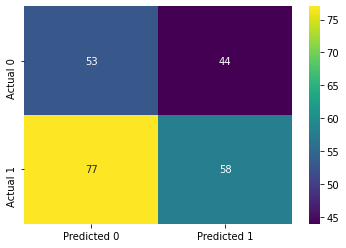

In [42]:
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred),
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

plot_confusion_matrix(y_val, y_pred);

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.55      0.47        97
           1       0.57      0.43      0.49       135

    accuracy                           0.48       232
   macro avg       0.49      0.49      0.48       232
weighted avg       0.50      0.48      0.48       232



In [44]:
spy

,Date,Close,Volume,Date_String,Year,SMA,SMA_Yesterday,Above_14D_SMA_Yesterday,Below_14D_SMA_Yesterday,Close_Higher_Than_Yesterday
0,1993-01-29,43.937500,1003200,1993-01-29,1993,NaN,NaN,1,1,n
1,1993-02-01,44.250000,480500,1993-02-01,1993,NaN,NaN,1,1,1
2,1993-02-02,44.343750,201300,1993-02-02,1993,NaN,NaN,1,1,1
3,1993-02-03,44.812500,529400,1993-02-03,1993,NaN,NaN,1,1,1
4,1993-02-04,45.000000,531500,1993-02-04,1993,NaN,NaN,1,1,1
...,...,...,...,...,...,...,...,...,...,...
6755,2019-11-25,313.369995,48647200,2019-11-25,2019,310.094997,309.642140,0,1,1
6756,2019-11-26,314.079987,37569000,2019-11-26,2019,310.593567,310.094997,0,1,1
6757,2019-11-27,315.480011,44444600,2019-11-27,2019,311.114997,310.593567,0,1,1
6758,2019-11-29,314.309998,36592700,2019-11-29,2019,311.498568,311.114997,0,1,0


# Continue to clean and explore your data. Make exploratory visualizations.

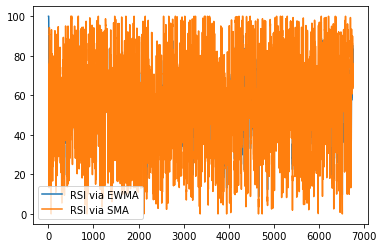

In [45]:
import pandas as pd

Close = spy['Close']

# Get the difference in price from previous step

delta = Close.diff()

# Get rid of the first row, which is NaN since it did not have a previous 
# row to calculate the differences
delta = delta[1:] 

# Make the positive gains (up) and negative gains (down) Series
up, down = delta.copy(), delta.copy()
up[up < 0] = 0
down[down > 0] = 0

# # Calculate the EWMA

spy['Roll_Up'] = up.shift(1)
spy['Roll_Down'] = down.abs().shift(1)

spy['Roll_Up1'] = spy['Roll_Up'].ewm(com=7).mean()
spy['Roll_Down1'] = spy['Roll_Down'].ewm(com=7).mean()

# # Calculate the RSI based on EWMA

RS1 = spy['Roll_Up1'] / spy['Roll_Down1']
RSI1 = 100.0 - (100.0 / (1.0 + RS1))

spy['RSI_Yesterday_EXP'] = RSI1

# Calculate the SMA
spy['Roll_Up2'] = spy['Roll_Up'].rolling(window = 7).mean()
spy['Roll_Down2'] = spy['Roll_Down'].rolling(window = 7).mean()

# Calculate the RSI based on SMA
RS2 = spy['Roll_Up2'] / spy['Roll_Down2']
RSI2 = 100.0 - (100.0 / (1.0 + RS2))

spy['RSI_Yesterday_SMA'] = RSI2

# Compare graphically
plt.figure()
RSI1.plot()
RSI2.plot()
plt.legend(['RSI via EWMA', 'RSI via SMA'])
plt.show()

In [46]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [47]:
spy['Overbought_Yesterday_EXP'] = spy['RSI_Yesterday_EXP'].shift(1) > 70.0
spy['Oversold_Yesterday_EXP'] = spy['RSI_Yesterday_EXP'].shift(1) < 30.0

spy['Overbought_Yesterday_SMA'] = spy['RSI_Yesterday_SMA'].shift(1) > 70.0
spy['Oversold_Yesterday_SMA'] = spy['RSI_Yesterday_SMA'].shift(1) < 30.0

In [48]:
spy['Overbought_Yesterday_EXP'].replace(to_replace=False,value=0, inplace=True)
spy['Oversold_Yesterday_EXP'].replace(to_replace=False,value=0, inplace=True)

spy['Overbought_Yesterday_SMA'].replace(to_replace=False,value=0, inplace=True)
spy['Oversold_Yesterday_SMA'].replace(to_replace=False,value=0, inplace=True)

In [49]:
spy['Oversold_EXP_And_Under_14D_SMA_Yesterday'] = ((spy['Oversold_Yesterday_EXP'] ==1) & (spy['Below_14D_SMA_Yesterday'] == 0))
spy['Oversold_SMA_And_Under_14D_SMA_Yesterday'] = ((spy['Oversold_Yesterday_SMA'] ==1) & (spy['Below_14D_SMA_Yesterday'] == 0))

In [50]:
spy['Oversold_EXP_And_Under_14D_SMA_Yesterday'].replace(to_replace=False,value=0, inplace=True)
spy['Oversold_SMA_And_Under_14D_SMA_Yesterday'].replace(to_replace=False,value=0, inplace=True)

In [51]:
spy['Volume_Yesterday'] = spy['Volume'].shift(1)

In [52]:
spy['Percent_Change_From_Yesterday'] = ((spy['Close']/spy['Close'].shift(1))-1)

In [53]:
spy.head()

,Date,Close,Volume,Date_String,Year,SMA,SMA_Yesterday,Above_14D_SMA_Yesterday,Below_14D_SMA_Yesterday,Close_Higher_Than_Yesterday,Roll_Up,Roll_Down,Roll_Up1,Roll_Down1,RSI_Yesterday_EXP,Roll_Up2,Roll_Down2,RSI_Yesterday_SMA,Overbought_Yesterday_EXP,Oversold_Yesterday_EXP,Overbought_Yesterday_SMA,Oversold_Yesterday_SMA,Oversold_EXP_And_Under_14D_SMA_Yesterday,Oversold_SMA_And_Under_14D_SMA_Yesterday,Volume_Yesterday,Percent_Change_From_Yesterday
0,1993-01-29,43.93750,1003200,1993-01-29,1993,NaN,NaN,1,1,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,1993-02-01,44.25000,480500,1993-02-01,1993,NaN,NaN,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1003200.0,0.007112
2,1993-02-02,44.34375,201300,1993-02-02,1993,NaN,NaN,1,1,1,0.31250,0.0,0.312500,0.0,100.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,480500.0,0.002119
3,1993-02-03,44.81250,529400,1993-02-03,1993,NaN,NaN,1,1,1,0.09375,0.0,0.195833,0.0,100.0,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,201300.0,0.010571
4,1993-02-04,45.00000,531500,1993-02-04,1993,NaN,NaN,1,1,1,0.46875,0.0,0.299186,0.0,100.0,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,529400.0,0.004184


In [54]:
spy.describe()

,Close,Volume,Year,SMA,SMA_Yesterday,Above_14D_SMA_Yesterday,Below_14D_SMA_Yesterday,Roll_Up,Roll_Down,Roll_Up1,Roll_Down1,RSI_Yesterday_EXP,Roll_Up2,Roll_Down2,RSI_Yesterday_SMA,Overbought_Yesterday_EXP,Oversold_Yesterday_EXP,Overbought_Yesterday_SMA,Oversold_Yesterday_SMA,Oversold_EXP_And_Under_14D_SMA_Yesterday,Oversold_SMA_And_Under_14D_SMA_Yesterday,Volume_Yesterday,Percent_Change_From_Yesterday
count,6760.000000,6.760000e+03,6760.000000,6747.000000,6746.000000,6760.000000,6760.000000,6758.000000,6758.000000,6758.000000,6758.000000,6758.000000,6752.000000,6752.000000,6752.000000,6760.000000,6760.000000,6760.000000,6760.000000,6760.000000,6760.000000,6.759000e+03,6759.000000
mean,136.488578,8.406512e+07,2005.989793,136.407462,136.381472,0.393047,0.609024,0.518532,0.478524,0.517965,0.478276,54.728971,0.518501,0.478789,55.398039,0.160503,0.059024,0.283876,0.143639,0.058136,0.132692,8.406634e+07,0.000355
std,62.638535,9.765457e+07,7.752270,62.359516,62.327584,0.488463,0.488005,0.896304,0.969380,0.314986,0.399142,15.021310,0.384225,0.481065,22.552068,0.367099,0.235686,0.450911,0.350749,0.234018,0.339267,9.766174e+07,0.011455
min,43.406250,5.200000e+03,1993.000000,44.104911,44.104911,0.000000,0.000000,0.000000,0.000000,0.042582,0.000000,7.834174,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.200000e+03,-0.098448
25%,97.710938,7.171250e+06,1999.000000,97.887433,97.837288,0.000000,0.000000,0.000000,0.000000,0.304976,0.203014,44.019352,0.242857,0.149554,38.873366,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.164600e+06,-0.004455
50%,125.465000,5.706840e+07,2006.000000,125.218573,125.218215,0.000000,1.000000,0.062500,0.000000,0.459963,0.373909,55.649524,0.439152,0.334286,55.531239,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.706440e+07,0.000591
75%,155.509998,1.214404e+08,2013.000000,155.219285,155.083391,1.000000,1.000000,0.709992,0.550003,0.664277,0.628495,66.128163,0.684532,0.649999,72.581901,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.214489e+08,0.005683
max,315.480011,8.710263e+08,2019.000000,311.733569,311.498568,1.000000,1.000000,12.849998,11.520019,2.251713,3.437684,100.000000,3.477142,4.432857,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.710263e+08,0.145198


In [55]:
spy_2019.head()

,Date,Close,Volume,Date_String,Year,SMA,SMA_Yesterday,Above_14D_SMA_Yesterday,Below_14D_SMA_Yesterday,Close_Higher_Than_Yesterday
6528,2019-01-02,250.179993,126925200,2019-01-02,2019,251.236426,252.232856,1,0,1
6529,2019-01-03,244.210007,144140700,2019-01-03,2019,249.718570,251.236426,1,0,0
6530,2019-01-04,252.389999,142628800,2019-01-04,2019,248.791428,249.718570,1,0,1
6531,2019-01-07,254.380005,103139100,2019-01-07,2019,248.356428,248.791428,0,1,1
6532,2019-01-08,256.769989,102512600,2019-01-08,2019,248.457141,248.356428,0,1,1


In [56]:
spy_2019.shape

(232, 10)

In [57]:
spy_2019 = spy[spy['Year'] == 2019]
spy_2018 = spy[spy['Year'] == 2018]
spy_2017 = spy[spy['Year'] == 2017]
spy_2016 = spy[spy['Year'] == 2016]
spy_2015 = spy[spy['Year'] == 2015]
spy_2014 = spy[spy['Year'] == 2014]
spy_2013 = spy[spy['Year'] == 2013]
spy_2012 = spy[spy['Year'] == 2012]
spy_2011 = spy[spy['Year'] == 2011]
spy_2010 = spy[spy['Year'] == 2010]
spy_2009 = spy[spy['Year'] == 2009]
spy_2008 = spy[spy['Year'] == 2008]
spy_2007 = spy[spy['Year'] == 2007]
spy_2006 = spy[spy['Year'] == 2006]
spy_2005 = spy[spy['Year'] == 2005]
spy_2004 = spy[spy['Year'] == 2004]
spy_2003 = spy[spy['Year'] == 2003]
spy_2002 = spy[spy['Year'] == 2002]
spy_2001 = spy[spy['Year'] == 2001]
spy_2000 = spy[spy['Year'] == 2000]
spy_1999 = spy[spy['Year'] == 1999]
spy_1998 = spy[spy['Year'] == 1998]
spy_1997 = spy[spy['Year'] == 1997]
spy_1996 = spy[spy['Year'] == 1996]
spy_1995 = spy[spy['Year'] == 1995]
spy_1994 = spy[spy['Year'] == 1994]
spy_1993 = spy[spy['Year'] == 1993]

# #FOLLOWING IS FOR QQQ
# spy_2019 = spy[spy['Year'] == 2019]
# spy_2018 = spy[spy['Year'] == 2018]
# spy_2017 = spy[spy['Year'] == 2017]
# spy_2016 = spy[spy['Year'] == 2016]
# spy_2015 = spy[spy['Year'] == 2015]
# spy_2014 = spy[spy['Year'] == 2014]
# spy_2013 = spy[spy['Year'] == 2013]
# spy_2012 = spy[spy['Year'] == 2012]
# spy_2011 = spy[spy['Year'] == 2011]
# spy_2010 = spy[spy['Year'] == 2010]
# spy_2009 = spy[spy['Year'] == 2009]
# spy_2008 = spy[spy['Year'] == 2008]
# spy_2007 = spy[spy['Year'] == 2007]
# spy_2006 = spy[spy['Year'] == 2006]
# spy_2005 = spy[spy['Year'] == 2005]
# spy_2004 = spy[spy['Year'] == 2004]
# spy_2003 = spy[spy['Year'] == 2003]
# spy_2002 = spy[spy['Year'] == 2002]
# spy_2001 = spy[spy['Year'] == 2001]
# spy_2000 = spy[spy['Year'] == 2000]

In [58]:
spy_1994_2013 = spy[(spy['Year'] >= 1994) & (spy['Year'] <=2013)]
spy_1994_2017 = spy[(spy['Year'] >= 1994) & (spy['Year'] <=2017)]
spy_2014_2019 = spy[(spy['Year'] >=2014) & (spy['Year'] <=2019)]

# #FOLLOWING IS FOR QQQ
# spy_1994_2013 = spy[(spy['Year'] >= 2000) & (spy['Year'] <=2013)]
# spy_1994_2017 = spy[(spy['Year'] >= 2000) & (spy['Year'] <=2017)]
# spy_2014_2019 = spy[(spy['Year'] >=2014) & (spy['Year'] <=2019)]

In [59]:
d={}
for x in range(1,10):
        d["string{0}".format(x)]="Hello"

years={}
for x in range(1993, 2019):
    years["spy_{0}".format(x)]=[x]

In [60]:
years['spy_2000']

[2000]

In [61]:
years

{'spy_1993': [1993],
 'spy_1994': [1994],
 'spy_1995': [1995],
 'spy_1996': [1996],
 'spy_1997': [1997],
 'spy_1998': [1998],
 'spy_1999': [1999],
 'spy_2000': [2000],
 'spy_2001': [2001],
 'spy_2002': [2002],
 'spy_2003': [2003],
 'spy_2004': [2004],
 'spy_2005': [2005],
 'spy_2006': [2006],
 'spy_2007': [2007],
 'spy_2008': [2008],
 'spy_2009': [2009],
 'spy_2010': [2010],
 'spy_2011': [2011],
 'spy_2012': [2012],
 'spy_2013': [2013],
 'spy_2014': [2014],
 'spy_2015': [2015],
 'spy_2016': [2016],
 'spy_2017': [2017],
 'spy_2018': [2018]}

In [62]:
# for x in range()

In [63]:
spy_2010_2013 = pd.concat([spy_2010,spy_2011,spy_2012,spy_2013])

In [64]:
spy_2019.columns.nunique()

26

In [65]:
target = 'Close_Higher_Than_Yesterday'

# BELOW ARE STANDARD DROPS (SOME CONTAIN FUTURE LEAKAGE)
# PREDICTS NEXT-DAY-NOT-CLOSE-UP DAYS
drop_xgboost = ['Date','Date_String','Volume','SMA','Roll_Up','Roll_Up1','Roll_Up2','Roll_Down','Roll_Down1',
        'Close','Roll_Down2', 'Percent_Change_From_Yesterday', 'Year', 'Oversold_EXP_And_Under_14D_SMA_Yesterday',
        'SMA_Yesterday']

# DROPPING EVERYTHING BUT RSI_Yesterday_EXP WHICH IS FOR RANDOMFORESTCLASSIFIER
#  AND PREDICTING NEXT-DAY-CLOSE-UP DAYS
drop_randomforest = ['Date','Date_String','Volume','SMA','Roll_Up','Roll_Up1','Roll_Up2','Roll_Down','Roll_Down1',
        'Close','Roll_Down2','RSI_Yesterday_SMA','Overbought_Yesterday_SMA','Volume_Yesterday',
        'Oversold_EXP_And_Under_14D_SMA_Yesterday','Year','SMA_Yesterday','Below_14D_SMA_Yesterday',
        'Oversold_SMA_And_Under_14D_SMA_Yesterday','Overbought_Yesterday_EXP','Oversold_Yesterday_EXP',
        'Oversold_Yesterday_SMA','Above_14D_SMA_Yesterday', 'Percent_Change_From_Yesterday']

train_randomforest = spy_1994_2013.drop(columns=drop_randomforest)
train_xgboost = spy_1994_2013.drop(columns=drop_xgboost)

test_randomforest = spy_2018.drop(columns=drop_randomforest)
test_xgboost = spy_2018.drop(columns=drop_xgboost)

val_randomforest = spy_2019.drop(columns=drop_randomforest)
val_xgboost = spy_2019.drop(columns=drop_xgboost)

X_val_randomforest = val_randomforest.drop(columns=target)
X_val_xgboost = val_xgboost.drop(columns=target)

y_val_randomforest = val_randomforest[target]
y_val_xgboost = val_xgboost[target]

X_test_randomforest = test_randomforest.drop(columns=target)
X_test_xgboost = test_xgboost.drop(columns=target)

y_test_randomforest = test_randomforest[target]
y_test_xgboost = test_xgboost[target]

X_train_randomforest = train_randomforest.drop(columns=target)
X_train_xgboost = train_xgboost.drop(columns=target)

y_train_randomforest = train_randomforest[target]
y_train_xgboost = train_xgboost[target]

In [66]:
# target = 'Close_Higher_Than_Yesterday'

# # BELOW ARE STANDARD DROPS (SOME CONTAIN FUTURE LEAKAGE)
# # PREDICTS NEXT-DAY-NOT-CLOSE-UP DAYS
# drop_randomforest = ['Date','Date_String','Volume','SMA','Roll_Up','Roll_Up1','Roll_Up2','Roll_Down','Roll_Down1',
#         'Close','Roll_Down2', 'Percent_Change_From_Yesterday']

# # DROPPING EVERYTHING BUT RSI_Yesterday_EXP WHICH IS FOR RANDOMFORESTCLASSIFIER
# #  AND PREDICTING NEXT-DAY-CLOSE-UP DAYS
# drop_xgboost = ['Date','Date_String','Volume','SMA','Roll_Up','Roll_Up1','Roll_Up2','Roll_Down','Roll_Down1',
#         'Close','Roll_Down2','RSI_Yesterday_SMA','Overbought_Yesterday_SMA','Volume_Yesterday',
#         'Oversold_EXP_And_Under_14D_SMA_Yesterday','Year','SMA_Yesterday','Below_14D_SMA_Yesterday',
#         'Oversold_SMA_And_Under_14D_SMA_Yesterday','Overbought_Yesterday_EXP','Oversold_Yesterday_EXP',
#         'Oversold_Yesterday_SMA','Above_14D_SMA_Yesterday', 'Percent_Change_From_Yesterday']

# train_randomforest = spy_1994_2013.drop(columns=drop_randomforest)
# train_xgboost = spy_1994_2013.drop(columns=drop_xgboost)

# test_randomforest = spy_2018.drop(columns=drop_randomforest)
# test_xgboost = spy_2018.drop(columns=drop_xgboost)

# val_randomforest = spy_2019.drop(columns=drop_randomforest)
# val_xgboost = spy_2019.drop(columns=drop_xgboost)

# X_val_randomforest = val_randomforest.drop(columns=target)
# X_val_xgboost = val_xgboost.drop(columns=target)

# y_val = val_randomforest[target]
# y_val = val_xgboost[target]

# X_test_randomforest = test.drop(columns=target)
# X_test_xgboost = test.drop(columns=target)

# y_test_randomforest = test_randomforest[target]
# y_test_xgboost = test_xgboost[target]

# X_train_randomforest = train_randomforest.drop(columns=target)
# X_train_xgboost = train_xgboost.drop(columns=target)

# y_train_randomforest = train_randomforest[target]
# y_train_xgboost = train_xgboost

In [67]:
# target = 'Close_Higher_Than_Yesterday'

# # BELOW ARE STANDARD DROPS (SOME CONTAIN FUTURE LEAKAGE)
# # PREDICTS NEXT-DAY-NOT-CLOSE-UP DAYS
# # drop = ['Date','Date_String','Volume','SMA','Roll_Up','Roll_Up1','Roll_Up2','Roll_Down','Roll_Down1',
# #         'Close','Roll_Down2', 'Percent_Change_From_Yesterday']

# # DROPPING EVERYTHING BUT RSI_Yesterday_EXP WHICH IS FOR RANDOMFORESTCLASSIFIER
# #  AND PREDICTING NEXT-DAY-CLOSE-UP DAYS
# drop = ['Date','Date_String','Volume','SMA','Roll_Up','Roll_Up1','Roll_Up2','Roll_Down','Roll_Down1',
#         'Close','Roll_Down2','RSI_Yesterday_SMA','Overbought_Yesterday_SMA','Volume_Yesterday',
#         'Oversold_EXP_And_Under_14D_SMA_Yesterday','Year','SMA_Yesterday','Below_14D_SMA_Yesterday',
#         'Oversold_SMA_And_Under_14D_SMA_Yesterday','Overbought_Yesterday_EXP','Oversold_Yesterday_EXP',
#         'Oversold_Yesterday_SMA','Above_14D_SMA_Yesterday', 'Percent_Change_From_Yesterday']

# train = spy_1994_2013.drop(columns=drop)
# test = spy_2018.drop(columns=drop)
# val = spy_2019.drop(columns=drop)

# X_val = val.drop(columns=target)
# y_val = val[target]

# X_test = test.drop(columns=target)
# y_test = test[target]

# X_train = train.drop(columns=target)
# y_train = train[target]

In [68]:
X_train_randomforest.columns

Index(['RSI_Yesterday_EXP'], dtype='object')

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

In [70]:
X_train_randomforest.isna().sum()

RSI_Yesterday_EXP    0
dtype: int64

In [71]:
pipeline = make_pipeline(
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train_randomforest, y_train_randomforest)
print('****MODEL VALIDATION ACCURACY**** = ', pipeline.score(X_val_randomforest, y_val_randomforest))

****MODEL VALIDATION ACCURACY**** =  0.5732758620689655


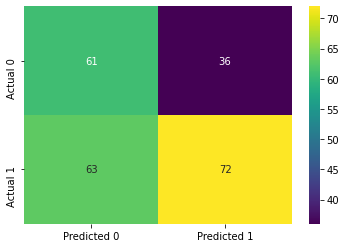

In [72]:
y_pred=pipeline.predict(X_val_randomforest)

plot_confusion_matrix(y_val_randomforest,y_pred)

In [73]:
print(classification_report(y_val_randomforest, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.63      0.55        97
           1       0.67      0.53      0.59       135

    accuracy                           0.57       232
   macro avg       0.58      0.58      0.57       232
weighted avg       0.59      0.57      0.58       232



# XGBOOSTING MODEL ---> TRASH VS RANDOM FOREST ON SINGLE FEATURE (RSI_Yesterday_EXP); RANDOM FOREST GENERATES .72 PRECISION FOR NEXT_DAY_UP_DAY CALCULATION
#                                              GREAT WHEN USING MULTI FEATURE AND PREDICTING NEXT_DAY_DOWN

In [74]:
pipeline_xgb = make_pipeline(
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline_xgb.fit(X_train_xgboost, y_train_xgboost)
print('****MODEL VALIDATION ACCURACY**** = ', pipeline_xgb.score(X_val_xgboost, y_val_xgboost))

****MODEL VALIDATION ACCURACY**** =  0.49137931034482757


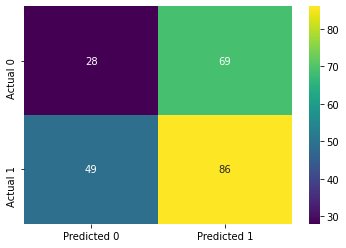

In [75]:
y_pred=pipeline_xgb.predict(X_val_xgboost)

plot_confusion_matrix(y_val_xgboost,y_pred)

In [76]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.36      0.29      0.32        97
           1       0.55      0.64      0.59       135

    accuracy                           0.49       232
   macro avg       0.46      0.46      0.46       232
weighted avg       0.47      0.49      0.48       232



In [77]:
X_val_xgboost.columns

Index(['Above_14D_SMA_Yesterday', 'Below_14D_SMA_Yesterday', 'RSI_Yesterday_EXP', 'RSI_Yesterday_SMA', 'Overbought_Yesterday_EXP', 'Oversold_Yesterday_EXP', 'Overbought_Yesterday_SMA', 'Oversold_Yesterday_SMA', 'Oversold_SMA_And_Under_14D_SMA_Yesterday', 'Volume_Yesterday'], dtype='object')

# ****MODEL VALIDATION ACCURACY**** =  0.6219512195121951

### IF X_val.columns -------> Index(['RSI_Yesterday_EXP'], dtype='object')

# Fit a model. Does it beat your baseline?

### YES

In [78]:
import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr = make_pipeline(
    ce.OrdinalEncoder(), # Not ideal for Linear Regression 
    StandardScaler(), 
    LinearRegression()
)

lr.fit(X_train_randomforest, y_train_randomforest)
print('Linear Regression R^2', lr.score(X_val_randomforest, y_val_randomforest))

Linear Regression R^2 -0.008252108225125676


In [79]:
X_val_example2 = spy[spy['Date'] == '2019-05-14']
X_val_example2.drop(columns=drop)

,Close,Volume,SMA_Yesterday,Above_14D_SMA_Yesterday,Below_14D_SMA_Yesterday,Close_Higher_Than_Yesterday,Roll_Up,Roll_Down,Roll_Up1,Roll_Down1,RSI_Yesterday_EXP,Roll_Up2,Roll_Down2,RSI_Yesterday_SMA,Overbought_Yesterday_EXP,Oversold_Yesterday_EXP,Overbought_Yesterday_SMA,Oversold_Yesterday_SMA,Oversold_EXP_And_Under_14D_SMA_Yesterday,Oversold_SMA_And_Under_14D_SMA_Yesterday,Volume_Yesterday,Percent_Change_From_Yesterday
6619,283.399994,77003200,290.464284,1,0,1,0.0,7.240021,0.503678,1.63443,23.557179,0.612858,2.087145,22.698426,0.0,0.0,0.0,0.0,0.0,0.0,127290500.0,0.009044


In [80]:
X_val_example = X_val_randomforest[X_val_randomforest['RSI_Yesterday_EXP'] <= 30]
X_val_example

,RSI_Yesterday_EXP
6619,23.557179
6630,29.247805
6632,25.547250
6633,24.399292
6676,28.129243
6677,16.204142
6718,23.251633


In [81]:
example = X_val_example.iloc[[0]]
example

,RSI_Yesterday_EXP
6619,23.557179


In [82]:
merged = pd.merge(spy, example, how='inner')
merged

,Date,Close,Volume,Date_String,Year,SMA,SMA_Yesterday,Above_14D_SMA_Yesterday,Below_14D_SMA_Yesterday,Close_Higher_Than_Yesterday,Roll_Up,Roll_Down,Roll_Up1,Roll_Down1,RSI_Yesterday_EXP,Roll_Up2,Roll_Down2,RSI_Yesterday_SMA,Overbought_Yesterday_EXP,Oversold_Yesterday_EXP,Overbought_Yesterday_SMA,Oversold_Yesterday_SMA,Oversold_EXP_And_Under_14D_SMA_Yesterday,Oversold_SMA_And_Under_14D_SMA_Yesterday,Volume_Yesterday,Percent_Change_From_Yesterday
0,2019-05-14,283.399994,77003200,2019-05-14,2019,289.833568,290.464284,1,0,1,0.0,7.240021,0.503678,1.63443,23.557179,0.612858,2.087145,22.698426,0.0,0.0,0.0,0.0,0.0,0.0,127290500.0,0.009044


In [83]:
spy.iloc[6619]

Date                                        2019-05-14 00:00:00
Close                                                     283.4
Volume                                                 77003200
Date_String                                          2019-05-14
Year                                                       2019
SMA                                                     289.834
SMA_Yesterday                                           290.464
Above_14D_SMA_Yesterday                                       1
Below_14D_SMA_Yesterday                                       0
Close_Higher_Than_Yesterday                                   1
Roll_Up                                                       0
Roll_Down                                               7.24002
Roll_Up1                                               0.503678
Roll_Down1                                              1.63443
RSI_Yesterday_EXP                                       23.5572
Roll_Up2                                

In [84]:
example1 = X_val_randomforest.iloc[[9]]
example1

,RSI_Yesterday_EXP
6537,57.314309


In [85]:
prediction = pipeline.predict(example1)[0]
print(f'Predicted Probability Close Higher Today: {prediction}')

Predicted Probability Close Higher Today: 1


In [86]:
example2 = X_val.iloc[[9]]
example2

,Close,Volume,SMA_Yesterday,Above_14D_SMA_Yesterday,Below_14D_SMA_Yesterday
6537,260.350006,85208300,251.244286,0,1


In [87]:
pred = lr.predict(example1)[0]
print(f'Predicted Probability Close Higher Today: {pred:.2f}')

Predicted Probability Close Higher Today: 0.54


In [88]:
example3 = X_val_example.iloc[[1]]
pred2 = lr.predict(example3)[0]
print(f'Predicted Probability Close Higher Today: {pred2:.2f}')

Predicted Probability Close Higher Today: 0.57


In [89]:
example3

,RSI_Yesterday_EXP
6630,29.247805


In [90]:
spy.dtypes

Date                                        datetime64[ns]
Close                                              float64
Volume                                               int64
Date_String                                         object
Year                                                 int64
SMA                                                float64
SMA_Yesterday                                      float64
Above_14D_SMA_Yesterday                              int32
Below_14D_SMA_Yesterday                              int32
Close_Higher_Than_Yesterday                         object
Roll_Up                                            float64
Roll_Down                                          float64
Roll_Up1                                           float64
Roll_Down1                                         float64
RSI_Yesterday_EXP                                  float64
Roll_Up2                                           float64
Roll_Down2                                         float

In [91]:
spy_date_string = spy[spy['Date_String'].str.find('2019-05-30') == 0]
spy_date_string.iloc

In [92]:
# data["Indexes"]= data["Name"].str.find(sub)

In [93]:
# [spy['Date_String'] == '2019-05-30'].iloc

In [94]:
spy.iloc[[6630]]

,Date,Close,Volume,Date_String,Year,SMA,SMA_Yesterday,Above_14D_SMA_Yesterday,Below_14D_SMA_Yesterday,Close_Higher_Than_Yesterday,Roll_Up,Roll_Down,Roll_Up1,Roll_Down1,RSI_Yesterday_EXP,Roll_Up2,Roll_Down2,RSI_Yesterday_SMA,Overbought_Yesterday_EXP,Oversold_Yesterday_EXP,Overbought_Yesterday_SMA,Oversold_Yesterday_SMA,Oversold_EXP_And_Under_14D_SMA_Yesterday,Oversold_SMA_And_Under_14D_SMA_Yesterday,Volume_Yesterday,Percent_Change_From_Yesterday
6630,2019-05-30,279.029999,62523800,2019-05-30,2019,283.530001,284.075001,1,0,1,0.0,1.880005,0.600626,1.452951,29.247805,0.45714,1.53857,22.906146,0.0,0.0,0.0,1.0,0.0,1.0,104972900.0,0.002731


In [95]:
example4 = X_val_randomforest.iloc[[4]]
pred3 = lr.predict(example4)[0]
print(f'Predicted Probability Close Higher Today: {pred3:.2f}')

Predicted Probability Close Higher Today: 0.54


In [96]:
example4

,RSI_Yesterday_EXP
6532,54.99024


In [97]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72

In [98]:
# conda install -c conda-forge category_encoders
# pip install category_encoders
# pip install plotly==4.1.0
# conda install -c conda-forge eli5 

import eli5
from eli5.sklearn import PermutationImportance

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_xgboost, y_train_xgboost)

permuter = PermutationImportance(
    model, scoring='accuracy', n_iter=2, random_state=42
)

permuter.fit(X_val_xgboost, y_val_xgboost)
feature_names = X_val_xgboost.columns.tolist()
eli5.show_weights(
    permuter,
    top=None,
    feature_names = feature_names
)

c:\users\sarmen\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
c:\users\sarmen\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight,Feature
0.0625 ± 0.0129,Overbought_Yesterday_SMA
0.0388 ± 0.0172,Overbought_Yesterday_EXP
0.0323 ± 0.0560,RSI_Yesterday_EXP
0.0129 ± 0.0172,Oversold_SMA_And_Under_14D_SMA_Yesterday
0.0129 ± 0.0172,RSI_Yesterday_SMA
0.0108 ± 0.0129,Oversold_Yesterday_SMA
0.0086 ± 0.0086,Oversold_Yesterday_EXP
-0.0043 ± 0.0517,Volume_Yesterday
-0.0086 ± 0.0172,Above_14D_SMA_Yesterday
-0.0129 ± 0.0259,Below_14D_SMA_Yesterday


# DO XGBOOST IN COLAB

In [99]:
# !conda install -c mndrake xgboost

In [100]:
# from sklearn.metrics import r2_score
# from xgboost import XGBRegressor

# gb = make_pipeline(
#     ce.OrdinalEncoder(), 
#     XGBRegressor(n_estimators=200, objective='reg:squarederror', n_jobs=-1)
# )

# gb.fit(X_train, y_train_log)
# y_pred_log = gb.predict(X_val)
# y_pred = np.expm1(y_pred_log)
# print('Gradient Boosting R^2', r2_score(y_val, y_pred))

In [101]:
# pip install pdpbox

In [102]:
# from pdpbox.pdp import pdp_isolate, pdp_plot

# feature = 'Close'

# isolated = pdp_isolate(
#     model=gb, 
#     dataset=X_val, 
#     model_features=X_val.columns, 
#     feature=feature
# )

# pdp_plot(isolated, feature_name=feature);

In [103]:
# spy.iloc[[2]].to_string()

In [104]:
# spy.iloc[[2]]

In [105]:
X_val

,Close,Volume,SMA_Yesterday,Above_14D_SMA_Yesterday,Below_14D_SMA_Yesterday
6528,250.179993,126925200,252.232856,1,0
6529,244.210007,144140700,251.236426,1,0
6530,252.389999,142628800,249.718570,1,0
6531,254.380005,103139100,248.791428,0,1
6532,256.769989,102512600,248.356428,0,1
6533,257.970001,95006600,248.457141,0,1
6534,258.880005,96823900,248.663570,0,1
6535,258.980011,73858100,249.207856,0,1
6536,257.399994,70908200,250.051429,0,1
6537,260.350006,85208300,251.244286,0,1


In [106]:
spy[6528:]

,Date,Close,Volume,Date_String,Year,SMA,SMA_Yesterday,Above_14D_SMA_Yesterday,Below_14D_SMA_Yesterday,Close_Higher_Than_Yesterday,Roll_Up,Roll_Down,Roll_Up1,Roll_Down1,RSI_Yesterday_EXP,Roll_Up2,Roll_Down2,RSI_Yesterday_SMA,Overbought_Yesterday_EXP,Oversold_Yesterday_EXP,Overbought_Yesterday_SMA,Oversold_Yesterday_SMA,Oversold_EXP_And_Under_14D_SMA_Yesterday,Oversold_SMA_And_Under_14D_SMA_Yesterday,Volume_Yesterday,Percent_Change_From_Yesterday
6528,2019-01-02,250.179993,126925200,2019-01-02,2019,251.236426,252.232856,1,0,1,2.169998,0.000000,1.655382,2.007266,45.196316,2.271430,2.462858,47.978279,0.0,0.0,0.0,0.0,0.0,0.0,144299400.0,0.001040
6529,2019-01-03,244.210007,144140700,2019-01-03,2019,249.718570,251.236426,1,0,0,0.259995,0.000000,1.480958,1.756357,45.746490,2.308572,1.878573,55.134755,0.0,0.0,0.0,0.0,0.0,0.0,126925200.0,-0.023863
6530,2019-01-04,252.389999,142628800,2019-01-04,2019,248.791428,249.718570,1,0,1,0.000000,5.969986,1.295839,2.283061,36.207737,2.308572,1.807142,56.091653,0.0,0.0,0.0,0.0,0.0,0.0,144140700.0,0.033496
6531,2019-01-07,254.380005,103139100,2019-01-07,2019,248.356428,248.791428,0,1,1,8.179992,0.000000,2.156358,1.997678,51.909942,3.477142,0.898570,79.464593,0.0,0.0,0.0,0.0,0.0,0.0,142628800.0,0.007885
6532,2019-01-08,256.769989,102512600,2019-01-08,2019,248.457141,248.356428,0,1,1,1.990006,0.000000,2.135564,1.747969,54.990240,2.070001,0.898570,69.730541,0.0,0.0,1.0,0.0,0.0,0.0,103139100.0,0.009395
6533,2019-01-09,257.970001,95006600,2019-01-09,2019,248.663570,248.457141,0,1,1,2.389984,0.000000,2.167366,1.529472,58.627558,2.141425,0.898570,70.441718,0.0,0.0,0.0,0.0,0.0,0.0,102512600.0,0.004673
6534,2019-01-10,258.880005,96823900,2019-01-10,2019,249.207856,248.663570,0,1,1,1.200012,0.000000,2.046447,1.338288,60.461062,2.312855,0.852855,73.059597,0.0,0.0,1.0,0.0,0.0,0.0,95006600.0,0.003528
6535,2019-01-11,258.980011,73858100,2019-01-11,2019,250.051429,249.207856,0,1,1,0.910004,0.000000,1.904392,1.171002,61.923501,2.132856,0.852855,71.435445,0.0,0.0,1.0,0.0,0.0,0.0,96823900.0,0.000386
6536,2019-01-14,257.399994,70908200,2019-01-14,2019,251.244286,250.051429,0,1,0,0.100006,0.000000,1.678843,1.024627,62.099565,2.110001,0.852855,71.215097,0.0,0.0,1.0,0.0,0.0,0.0,73858100.0,-0.006101
6537,2019-01-15,260.350006,85208300,2019-01-15,2019,253.102143,251.244286,0,1,1,0.000000,1.580017,1.468988,1.094051,57.314309,2.110001,0.225717,90.336300,0.0,0.0,1.0,0.0,0.0,0.0,70908200.0,0.011461


In [107]:
spy_close_higher = y_val['Close_Higher_Than_Yesterday']
spy_close_higher

6528    1
6529    0
6530    1
6531    1
6532    1
6533    1
6534    1
6535    1
6536    0
6537    1
6538    1
6539    1
6540    1
6541    0
6542    1
6543    1
6544    1
6545    0
6546    0
6547    1
6548    1
6549    1
6550    1
6551    1
6552    0
6553    0
6554    1
6555    1
6556    1
6557    1
6558    0
6559    1
6560    1
6561    1
6562    0
6563    1
6564    1
6565    0
6566    0
6567    0
6568    1
6569    0
6570    0
6571    0
6572    0
6573    0
6574    1
6575    1
6576    1
6577    0
6578    1
6579    1
6580    1
6581    0
6582    1
6583    0
6584    0
6585    1
6586    0
6587    1
6588    1
6589    1
6590    1
6591    1
6592    1
6593    1
6594    1
6595    0
6596    1
6597    0
6598    1
6599    0
6600    1
6601    0
6602    1
6603    1
6604    1
6605    0
6606    0
6607    1
6608    1
6609    1
6610    0
6611    0
6612    1
6613    0
6614    0
6615    0
6616    0
6617    1
6618    0
6619    1
6620    1
6621    1
6622    0
6623    0
6624    1
6625    0
6626    0
6627    1


In [108]:
spy_close_higher = spy_close_higher.reset_index(drop=True)
spy_close_higher

0      1
1      0
2      1
3      1
4      1
5      1
6      1
7      1
8      0
9      1
10     1
11     1
12     1
13     0
14     1
15     1
16     1
17     0
18     0
19     1
20     1
21     1
22     1
23     1
24     0
25     0
26     1
27     1
28     1
29     1
30     0
31     1
32     1
33     1
34     0
35     1
36     1
37     0
38     0
39     0
40     1
41     0
42     0
43     0
44     0
45     0
46     1
47     1
48     1
49     0
50     1
51     1
52     1
53     0
54     1
55     0
56     0
57     1
58     0
59     1
60     1
61     1
62     1
63     1
64     1
65     1
66     1
67     0
68     1
69     0
70     1
71     0
72     1
73     0
74     1
75     1
76     1
77     0
78     0
79     1
80     1
81     1
82     0
83     0
84     1
85     0
86     0
87     0
88     0
89     1
90     0
91     1
92     1
93     1
94     0
95     0
96     1
97     0
98     0
99     1
100    0
101    0
102    1
103    0
104    0
105    1
106    1
107    1
108    1
109    1
110    0
1

In [109]:
X_val.columns

Index(['Close', 'Volume', 'SMA_Yesterday', 'Above_14D_SMA_Yesterday', 'Below_14D_SMA_Yesterday'], dtype='object')

In [110]:
len(y_val)

232

In [111]:
y_pred = pipeline.predict(X_val_randomforest)
y_pred

array(['1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '0', '0', '0',
       '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0',
       '1', '1', '0', '1', '1', '0', '1', '1', '0', '0', '1', '0', '0',
       '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1',
       '1', '0', '1', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1',
       '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0',
       '0', '0', '0', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1',
       '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0',
       '0', '1', '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0',
       '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1',
       '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0',
       '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '1', '0', '1',
       '1', '1', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1',
       '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0

In [112]:
s = pd.Series(y_pred) 
s

0      1
1      0
2      1
3      1
4      1
5      1
6      1
7      1
8      0
9      1
10     0
11     0
12     0
13     0
14     1
15     1
16     0
17     0
18     1
19     1
20     0
21     0
22     1
23     1
24     0
25     0
26     1
27     1
28     0
29     1
30     1
31     0
32     1
33     1
34     0
35     0
36     1
37     0
38     0
39     0
40     1
41     1
42     0
43     0
44     0
45     0
46     1
47     0
48     0
49     0
50     0
51     1
52     1
53     0
54     1
55     1
56     0
57     1
58     0
59     1
60     0
61     1
62     1
63     1
64     1
65     0
66     0
67     0
68     0
69     1
70     0
71     0
72     1
73     0
74     0
75     1
76     0
77     0
78     0
79     0
80     0
81     1
82     1
83     0
84     1
85     1
86     0
87     0
88     1
89     0
90     1
91     0
92     1
93     0
94     0
95     0
96     0
97     0
98     1
99     1
100    0
101    1
102    0
103    0
104    0
105    1
106    1
107    1
108    1
109    1
110    0
1

In [113]:
preds = s.to_frame(name='Predictions')
preds

,Predictions
0,1
1,0
2,1
3,1
4,1
5,1
6,1
7,1
8,0
9,1


In [114]:
len(preds)

232

In [115]:
actual_and_preds = pd.concat([spy_close_higher,preds], axis=1)
actual_and_preds.head()

,Close_Higher_Than_Yesterday,Predictions
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1


In [116]:
actual_and_preds.shape

(232, 2)

In [117]:
# actual_and_preds.

In [118]:
actual_and_preds

,Close_Higher_Than_Yesterday,Predictions
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,0,0
9,1,1


In [119]:
actual_and_preds = actual_and_preds.drop(actual_and_preds.index[0])

In [120]:
actual_and_preds

,Close_Higher_Than_Yesterday,Predictions
1,0,0
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,0,0
9,1,1
10,1,0


In [121]:
actual_and_preds['Close_Higher_Than_Yesterday'] = (actual_and_preds['Close_Higher_Than_Yesterday']).astype(int)

In [122]:
actual_and_preds.dropna(axis=0, inplace=True)

In [123]:
actual_and_preds['Predictions'] = (actual_and_preds['Predictions']).astype(int)

In [124]:
actual_and_preds.tail()

,Close_Higher_Than_Yesterday,Predictions
227,1,1
228,1,0
229,1,0
230,0,1
231,0,1


In [125]:
actual_and_preds['pred_yes_was_yes'] = (
    (actual_and_preds['Close_Higher_Than_Yesterday']==1) & (actual_and_preds['Predictions']==1)
)

actual_and_preds['pred_yes_was_no'] = (
    (actual_and_preds['Predictions'] ==1) & (actual_and_preds['Close_Higher_Than_Yesterday']==0)
)

actual_and_preds['pred_no_was_yes'] = (
    (actual_and_preds['Close_Higher_Than_Yesterday']==1) & (actual_and_preds['Predictions']==0)
)

actual_and_preds['pred_no_was_no'] = (
    (actual_and_preds['Predictions'] ==0) & (actual_and_preds['Close_Higher_Than_Yesterday']==0)
)

In [126]:
actual_and_preds.shape

(231, 6)

In [127]:
actual_and_preds['pred_yes_was_yes'] = np.where(actual_and_preds['pred_yes_was_yes']==True, 1,0)
actual_and_preds['pred_yes_was_no'] = np.where(actual_and_preds['pred_yes_was_no']==True, 1,0)
actual_and_preds['pred_no_was_yes'] = np.where(actual_and_preds['pred_no_was_yes']==True, 1,0)
actual_and_preds['pred_no_was_no'] = np.where(actual_and_preds['pred_no_was_no']==True, 1,0)

In [128]:
actual_and_preds

,Close_Higher_Than_Yesterday,Predictions,pred_yes_was_yes,pred_yes_was_no,pred_no_was_yes,pred_no_was_no
1,0,0,0,0,0,1
2,1,1,1,0,0,0
3,1,1,1,0,0,0
4,1,1,1,0,0,0
5,1,1,1,0,0,0
6,1,1,1,0,0,0
7,1,1,1,0,0,0
8,0,0,0,0,0,1
9,1,1,1,0,0,0
10,1,0,0,0,1,0


In [129]:
len(actual_and_preds)

231

In [130]:
spy_2019

,Date,Close,Volume,Date_String,Year,SMA,SMA_Yesterday,Above_14D_SMA_Yesterday,Below_14D_SMA_Yesterday,Close_Higher_Than_Yesterday,Roll_Up,Roll_Down,Roll_Up1,Roll_Down1,RSI_Yesterday_EXP,Roll_Up2,Roll_Down2,RSI_Yesterday_SMA,Overbought_Yesterday_EXP,Oversold_Yesterday_EXP,Overbought_Yesterday_SMA,Oversold_Yesterday_SMA,Oversold_EXP_And_Under_14D_SMA_Yesterday,Oversold_SMA_And_Under_14D_SMA_Yesterday,Volume_Yesterday,Percent_Change_From_Yesterday
6528,2019-01-02,250.179993,126925200,2019-01-02,2019,251.236426,252.232856,1,0,1,2.169998,0.000000,1.655382,2.007266,45.196316,2.271430,2.462858,47.978279,0.0,0.0,0.0,0.0,0.0,0.0,144299400.0,0.001040
6529,2019-01-03,244.210007,144140700,2019-01-03,2019,249.718570,251.236426,1,0,0,0.259995,0.000000,1.480958,1.756357,45.746490,2.308572,1.878573,55.134755,0.0,0.0,0.0,0.0,0.0,0.0,126925200.0,-0.023863
6530,2019-01-04,252.389999,142628800,2019-01-04,2019,248.791428,249.718570,1,0,1,0.000000,5.969986,1.295839,2.283061,36.207737,2.308572,1.807142,56.091653,0.0,0.0,0.0,0.0,0.0,0.0,144140700.0,0.033496
6531,2019-01-07,254.380005,103139100,2019-01-07,2019,248.356428,248.791428,0,1,1,8.179992,0.000000,2.156358,1.997678,51.909942,3.477142,0.898570,79.464593,0.0,0.0,0.0,0.0,0.0,0.0,142628800.0,0.007885
6532,2019-01-08,256.769989,102512600,2019-01-08,2019,248.457141,248.356428,0,1,1,1.990006,0.000000,2.135564,1.747969,54.990240,2.070001,0.898570,69.730541,0.0,0.0,1.0,0.0,0.0,0.0,103139100.0,0.009395
6533,2019-01-09,257.970001,95006600,2019-01-09,2019,248.663570,248.457141,0,1,1,2.389984,0.000000,2.167366,1.529472,58.627558,2.141425,0.898570,70.441718,0.0,0.0,0.0,0.0,0.0,0.0,102512600.0,0.004673
6534,2019-01-10,258.880005,96823900,2019-01-10,2019,249.207856,248.663570,0,1,1,1.200012,0.000000,2.046447,1.338288,60.461062,2.312855,0.852855,73.059597,0.0,0.0,1.0,0.0,0.0,0.0,95006600.0,0.003528
6535,2019-01-11,258.980011,73858100,2019-01-11,2019,250.051429,249.207856,0,1,1,0.910004,0.000000,1.904392,1.171002,61.923501,2.132856,0.852855,71.435445,0.0,0.0,1.0,0.0,0.0,0.0,96823900.0,0.000386
6536,2019-01-14,257.399994,70908200,2019-01-14,2019,251.244286,250.051429,0,1,0,0.100006,0.000000,1.678843,1.024627,62.099565,2.110001,0.852855,71.215097,0.0,0.0,1.0,0.0,0.0,0.0,73858100.0,-0.006101
6537,2019-01-15,260.350006,85208300,2019-01-15,2019,253.102143,251.244286,0,1,1,0.000000,1.580017,1.468988,1.094051,57.314309,2.110001,0.225717,90.336300,0.0,0.0,1.0,0.0,0.0,0.0,70908200.0,0.011461


In [131]:
len(spy_2019)

232

In [132]:
len(actual_and_preds[actual_and_preds['pred_yes_was_yes'] == 1])

71

In [133]:
len(actual_and_preds[actual_and_preds['pred_yes_was_no'] == 1])

36

In [134]:
len(actual_and_preds[actual_and_preds['Predictions'] == 1])

107

In [135]:
len(actual_and_preds[actual_and_preds['Close_Higher_Than_Yesterday'] == 1])

134

In [136]:
len(actual_and_preds[actual_and_preds['pred_yes_was_no'] == 1])/len(actual_and_preds[actual_and_preds['Predictions'] == 1])

0.3364485981308411

In [137]:
len(actual_and_preds[actual_and_preds['pred_yes_was_yes'] == 1])/len(actual_and_preds[actual_and_preds['Predictions'] == 1])

0.6635514018691588

In [138]:
spy_2019_dates = spy_2019['Date'].reset_index(drop=True)

In [139]:
spy_2019_dates

0     2019-01-02
1     2019-01-03
2     2019-01-04
3     2019-01-07
4     2019-01-08
5     2019-01-09
6     2019-01-10
7     2019-01-11
8     2019-01-14
9     2019-01-15
10    2019-01-16
11    2019-01-17
12    2019-01-18
13    2019-01-22
14    2019-01-23
15    2019-01-24
16    2019-01-25
17    2019-01-28
18    2019-01-29
19    2019-01-30
20    2019-01-31
21    2019-02-01
22    2019-02-04
23    2019-02-05
24    2019-02-06
25    2019-02-07
26    2019-02-08
27    2019-02-11
28    2019-02-12
29    2019-02-13
30    2019-02-14
31    2019-02-15
32    2019-02-19
33    2019-02-20
34    2019-02-21
35    2019-02-22
36    2019-02-25
37    2019-02-26
38    2019-02-27
39    2019-02-28
40    2019-03-01
41    2019-03-04
42    2019-03-05
43    2019-03-06
44    2019-03-07
45    2019-03-08
46    2019-03-11
47    2019-03-12
48    2019-03-13
49    2019-03-14
50    2019-03-15
51    2019-03-18
52    2019-03-19
53    2019-03-20
54    2019-03-21
55    2019-03-22
56    2019-03-25
57    2019-03-26
58    2019-03-

In [140]:
actual_and_preds_dated = pd.concat([actual_and_preds,spy_2019_dates], axis=1)

In [141]:
actual_and_preds_dated

,Close_Higher_Than_Yesterday,Predictions,pred_yes_was_yes,pred_yes_was_no,pred_no_was_yes,pred_no_was_no,Date
0,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-02
1,0.0,0.0,0.0,0.0,0.0,1.0,2019-01-03
2,1.0,1.0,1.0,0.0,0.0,0.0,2019-01-04
3,1.0,1.0,1.0,0.0,0.0,0.0,2019-01-07
4,1.0,1.0,1.0,0.0,0.0,0.0,2019-01-08
5,1.0,1.0,1.0,0.0,0.0,0.0,2019-01-09
6,1.0,1.0,1.0,0.0,0.0,0.0,2019-01-10
7,1.0,1.0,1.0,0.0,0.0,0.0,2019-01-11
8,0.0,0.0,0.0,0.0,0.0,1.0,2019-01-14
9,1.0,1.0,1.0,0.0,0.0,0.0,2019-01-15


In [142]:
actual_and_preds_dated.dropna(axis=0, inplace=True)

In [143]:
actual_and_preds_dated.isna().sum()

Close_Higher_Than_Yesterday    0
Predictions                    0
pred_yes_was_yes               0
pred_yes_was_no                0
pred_no_was_yes                0
pred_no_was_no                 0
Date                           0
dtype: int64

In [144]:
actual_and_preds.shape

(231, 6)

In [145]:
actual_and_preds.dtypes

Close_Higher_Than_Yesterday    int32
Predictions                    int32
pred_yes_was_yes               int32
pred_yes_was_no                int32
pred_no_was_yes                int32
pred_no_was_no                 int32
dtype: object

In [146]:
spy_2019_drop = ['Date','Date_String','Volume','SMA','Roll_Up','Roll_Up1','Roll_Up2','Roll_Down','Roll_Down1',
        'Close','Roll_Down2','RSI_Yesterday_SMA','Overbought_Yesterday_SMA','Volume_Yesterday',
        'Oversold_EXP_And_Under_14D_SMA_Yesterday','Year','SMA_Yesterday','Below_14D_SMA_Yesterday',
        'Oversold_SMA_And_Under_14D_SMA_Yesterday','Overbought_Yesterday_EXP','Oversold_Yesterday_EXP',
        'Oversold_Yesterday_SMA','Above_14D_SMA_Yesterday','Close_Higher_Than_Yesterday','RSI_Yesterday_EXP']
spy_2019_dropped = spy_2019.drop(columns=spy_2019_drop)
spy_2019_dropped1 = spy_2019_dropped

In [147]:
# 

In [148]:
spy_2019_dropped1 = spy_2019_dropped['Percent_Change_From_Yesterday']

In [149]:
# pd.concat(spy_2019_dropped1, actual_and_preds)